In [1]:
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import RegexpStemmer
from nltk.stem import LancasterStemmer
from nltk.text import Text
from nltk.chunk import ne_chunk

In [2]:
text = "U.S.A first. time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

U.S.A first. time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [3]:
# Sentence Tokenize
sent_tokenize(text)

['U.S.A first.',
 'time you see The Second Renaissance it may look boring.',
 'Look at it at least twice and definitely watch part 2.',
 'It will change your view of the matrix.',
 'Are the human people the ones who started the war ?',
 'Is AI a bad thing ?']

In [4]:
# Word Tokenize
tokens=word_tokenize(text)
print(tokens)

['U.S.A', 'first', '.', 'time', 'you', 'see', 'The', 'Second', 'Renaissance', 'it', 'may', 'look', 'boring', '.', 'Look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', '.', 'It', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', '.', 'Are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', '?', 'Is', 'AI', 'a', 'bad', 'thing', '?']


In [5]:
# to convert every word to lower case
tokens = [word.lower() for word in tokens]
print(tokens)

['u.s.a', 'first', '.', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', '.', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', '.', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', '.', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', '?', 'is', 'ai', 'a', 'bad', 'thing', '?']


In [6]:
t = Text(tokens)
print(t)

<Text: u.s.a first . time you see the second...>


In [7]:
t.count('the')

5

In [8]:
t.index('see')

5

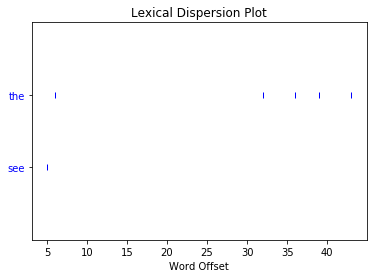

In [9]:
t.dispersion_plot(['the','see'])

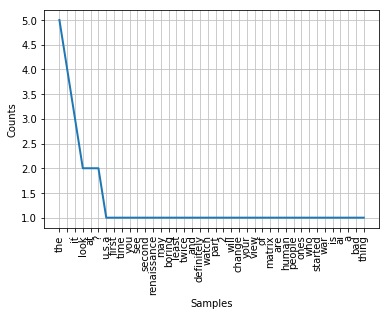

In [10]:
t.plot(50)

In [11]:
set(tokens) # gets all the words in form of sets

{'.',
 '2',
 '?',
 'a',
 'ai',
 'and',
 'are',
 'at',
 'bad',
 'boring',
 'change',
 'definitely',
 'first',
 'human',
 'is',
 'it',
 'least',
 'look',
 'matrix',
 'may',
 'of',
 'ones',
 'part',
 'people',
 'renaissance',
 'second',
 'see',
 'started',
 'the',
 'thing',
 'time',
 'twice',
 'u.s.a',
 'view',
 'war',
 'watch',
 'who',
 'will',
 'you',
 'your'}

In [12]:
# to get the number of frequency
t.vocab()

FreqDist({'the': 5, '.': 4, 'it': 3, 'look': 2, 'at': 2, '?': 2, 'u.s.a': 1, 'first': 1, 'time': 1, 'you': 1, ...})

In [13]:
print(text.split())

['U.S.A', 'first.', 'time', 'you', 'see', 'The', 'Second', 'Renaissance', 'it', 'may', 'look', 'boring.', 'Look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2.', 'It', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix.', 'Are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', '?', 'Is', 'AI', 'a', 'bad', 'thing', '?']


In [14]:
text = text.upper()
print(text)

U.S.A FIRST. TIME YOU SEE THE SECOND RENAISSANCE IT MAY LOOK BORING. LOOK AT IT AT LEAST TWICE AND DEFINITELY WATCH PART 2. IT WILL CHANGE YOUR VIEW OF THE MATRIX. ARE THE HUMAN PEOPLE THE ONES WHO STARTED THE WAR ? IS AI A BAD THING ?


In [15]:
print(stopwords.words('english')) # all the stop words in english language

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
# for removing the punctuation
text = re.sub(r'[^a-zA-Z0-9]',' ',text)
print(text)

u s a first  time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


In [17]:
text = text.lower()
print(text)

u s a first  time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


In [18]:
# to split the words
words = text.split()
print(words)
print(len(words))

['u', 's', 'a', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']
48


In [19]:
# remove stop words
for w in words:
    if w not in stopwords.words("english"):
        print(w)

u
first
time
see
second
renaissance
may
look
boring
look
least
twice
definitely
watch
part
2
change
view
matrix
human
people
ones
started
war
ai
bad
thing


In [20]:
words = word_tokenize(text)
print(words)
print(len(words))

['u', 's', 'a', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']
48


In [21]:
for w in words:
    if(len(w)>5):
        print(w)

second
renaissance
boring
definitely
change
matrix
people
started


In [22]:
sent = sent_tokenize(text)
print(text)

u s a first  time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


In [25]:
#Stemming (reducing a word to word stem)
stem = [PorterStemmer().stem(w) for w in words]
print(stem)

['u', 's', 'a', 'first', 'time', 'you', 'see', 'the', 'second', 'renaiss', 'it', 'may', 'look', 'bore', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definit', 'watch', 'part', '2', 'it', 'will', 'chang', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'peopl', 'the', 'one', 'who', 'start', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [26]:
lemma = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemma)

['u', 's', 'a', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'one', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


- Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word

In [37]:
len(words)
#len(set(new_words))
#sorted(set(new_words))

48

In [38]:
fd = nltk.FreqDist(text)
print(fd.most_common())

[(' ', 55), ('e', 22), ('t', 21), ('a', 19), ('i', 16), ('o', 12), ('s', 10), ('h', 10), ('n', 10), ('r', 9), ('l', 7), ('w', 6), ('c', 5), ('d', 5), ('u', 4), ('m', 4), ('y', 4), ('f', 3), ('g', 3), ('p', 3), ('k', 2), ('b', 2), ('2', 1), ('v', 1), ('x', 1)]


In [40]:
pos_tags = nltk.pos_tag(words)
pos_tags

[('u', 'JJ'),
 ('s', 'VBD'),
 ('a', 'DT'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('you', 'PRP'),
 ('see', 'VBP'),
 ('the', 'DT'),
 ('second', 'JJ'),
 ('renaissance', 'NN'),
 ('it', 'PRP'),
 ('may', 'MD'),
 ('look', 'VB'),
 ('boring', 'JJ'),
 ('look', 'NN'),
 ('at', 'IN'),
 ('it', 'PRP'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('twice', 'RB'),
 ('and', 'CC'),
 ('definitely', 'RB'),
 ('watch', 'VB'),
 ('part', 'NN'),
 ('2', 'CD'),
 ('it', 'PRP'),
 ('will', 'MD'),
 ('change', 'VB'),
 ('your', 'PRP$'),
 ('view', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('matrix', 'NN'),
 ('are', 'VBP'),
 ('the', 'DT'),
 ('human', 'JJ'),
 ('people', 'NNS'),
 ('the', 'DT'),
 ('ones', 'NNS'),
 ('who', 'WP'),
 ('started', 'VBD'),
 ('the', 'DT'),
 ('war', 'NN'),
 ('is', 'VBZ'),
 ('ai', 'RP'),
 ('a', 'DT'),
 ('bad', 'JJ'),
 ('thing', 'NN')]

In [43]:
print(PorterStemmer().stem('maths'))
print(WordNetLemmatizer().lemmatize('mathmatics'))
print(LancasterStemmer().stem('mathematics'))
      

math
mathmatics
mathem


In [44]:
s = WordNetLemmatizer()
print(s.lemmatize('am', pos='v'))
print(s.lemmatize('is', pos='v'))
print(s.lemmatize('was', pos='v'))

be
be
be
